<a href="https://colab.research.google.com/github/varshareddykumbham/Speech-Emotion-Recognition-using-RNN-LSTM/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/My Drive/ravdess_ser

/content/drive/My Drive/ravdess_ser


In [ ]:
import numpy as np
from keras.models import Sequential  
from keras.layers import Dense, Activation, GRU, Flatten, LSTM, Flatten,SimpleRNN
from keras.layers import Dropout, BatchNormalization, Bidirectional
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X=np.load('X.npy')  
y=np.load('y.npy')
X = X.reshape((X.shape[0], 1, X.shape[1]))
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

# DNN layer units
n_dim = train_x.shape[2]  
n_classes = train_y.shape[1]
earlystop = EarlyStopping(monitor='val_acc', mode='max', patience=75, restore_best_weights=False)
checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=False)

# function to define model
def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(1, 193)))
    model.add(LSTM(n_dim, return_sequences=True, dropout=0.1, #input_shape=(1, 193),
                 recurrent_dropout=0.2))  
    model.add(LSTM(n_dim*2, dropout=0.1, recurrent_dropout=0.2, return_sequences=True,activation='tanh'))
    model.add(LSTM(n_dim, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(n_dim, input_shape=(1,193)))
    #model.add(Dense(n_dim,activation='relu'))
    model.add(Dropout (0.2)) 
    model.add(Dense(n_classes, activation='softmax'))
              
    # model compilation  
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  
    return model
   
# create the model  
model = create_model()
print(model.summary())

# train the model  
hist = model.fit(train_x, train_y, epochs=200, batch_size=32,validation_data=[test_x[:150], test_y[:150]], callbacks=[earlystop])
print(max(hist.history['accuracy']), max(hist.history['val_accuracy']))
# evaluate model, test data may differ from validation data
evaluate = model.evaluate(test_x[150:], test_y[150:], batch_size=32)
print(evaluate)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1, 193)            772       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 193)            298764    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 386)            895520    
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 193)            447760    
_________________________________________________________________
flatten_1 (Flatten)          (None, 193)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 193)               37442     
_________________________________________________________________
dropout_1 (Dropout)          (None, 193)              

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1159/1159 [==============================] - 1s 497us/step - loss: 1.6673 - accuracy: 0.3676 - val_loss: 2.0354 - val_accuracy: 0.2667
Epoch 3/200
1159/1159 [==============================] - 1s 508us/step - loss: 1.5357 - accuracy: 0.4150 - val_loss: 2.1227 - val_accuracy: 0.3400
Epoch 4/200
1159/1159 [==============================] - 1s 511us/step - loss: 1.4250 - accuracy: 0.4676 - val_loss: 2.2283 - val_accuracy: 0.3133
Epoch 5/200
1159/1159 [==============================] - 1s 514us/step - loss: 1.3642 - accuracy: 0.4702 - val_loss: 2.0169 - val_accuracy: 0.3200
Epoch 6/200
1159/1159 [==============================] - 1s 534us/step - loss: 1.2305 - accuracy: 0.5229 - val_loss: 1.9655 - val_accuracy: 0.3067
Epoch 7/200
1159/1159 [==============================] - 1s 502us/step - loss: 1.2264 - accuracy: 0.5393 - val_loss: 1.6148 - val_accuracy: 0.4267
Epoch 8/200
1159/1159 [==============================] - 1s 538us/step - loss: 1.1429 - accuracy: 0.5634 - val_loss: 1.3789 - val_

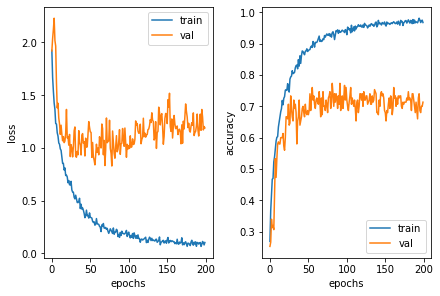

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
ax = axs[0]
ax.plot(hist.history['loss'], label='train')
ax.plot(hist.history['val_loss'], label='val')
ax.legend()
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax = axs[1] 
ax.plot(hist.history['accuracy'], label='train')
ax.plot(hist.history['val_accuracy'], label='val')
ax.legend()
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs')
plt.show()


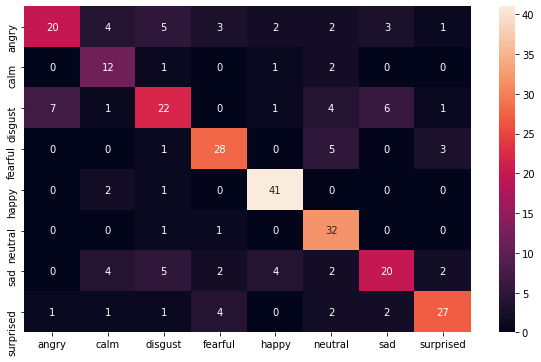

In [ ]:
predict = model.predict(test_x,batch_size=4)
emotions=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised','others']  

# predicted emotions from the test set  
y_pred = np.argmax(predict, 1)  
predicted_emo = []   
for i in range(0,test_y.shape[0]):  
    emo = emotions[y_pred[i]]  
    predicted_emo.append(emo)
    
actual_emo = []  
y_true = np.argmax(test_y, 1)  
for i in range(0,test_y.shape[0]):  
    emo = emotions[y_true[i]]  
    actual_emo.append(emo)
        
# generate the confusion matrix  
cm = confusion_matrix(actual_emo, predicted_emo)  
index = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']  
columns = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']  
cm_df = pd.DataFrame(cm, index, columns)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score 
print('Accuracy Score :',accuracy_score(actual_emo, predicted_emo))

Accuracy Score : 0.696551724137931
